In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/Acer/Desktop/\ML project/Wind_Power_Generation_Decision_APP/Wind_dataset.csv')

# Display basic info about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nSummary statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7265 entries, 0 to 7264
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       7265 non-null   object 
 1   WindSpeed  7265 non-null   float64
 2   Power      7265 non-null   float64
dtypes: float64(2), object(1)
memory usage: 170.4+ KB
None

First 5 rows:
                  Time  WindSpeed      Power
0  2014-10-07 02:00:00   7.567500  29.605953
1  2014-10-07 03:00:00   5.921667  12.383663
2  2014-10-07 04:00:00   6.256667  14.702530
3  2014-10-07 05:00:00   6.238333  15.391273
4  2014-10-07 06:00:00   6.951667  23.176807

Summary statistics:
         WindSpeed        Power
count  7265.000000  7265.000000
mean      6.842653    30.722012
std       2.090319    26.140030
min       0.658333    -0.007123
25%       5.273333     9.461201
50%       6.668333    22.952010
75%       8.113333    46.109500
max      19.086667    99.433638


<>:10: SyntaxWarning: invalid escape sequence '\M'
<>:10: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Acer\AppData\Local\Temp\ipykernel_21312\1599282454.py:10: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv('C:/Users/Acer/Desktop/\ML project/Wind_Power_Generation_Decision_APP/Wind_dataset.csv')


In [3]:
# Convert Time column to datetime format and extract features
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour
data['Day'] = data['Time'].dt.day
data['Month'] = data['Time'].dt.month

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Drop the original Time column as we've extracted temporal features
data = data.drop('Time', axis=1)

# Separate features (X) and target (y)
X = data.drop('Power', axis=1)
y = data['Power']

# Split into training (first 364 days) and test (last day) sets
# Assuming approximately 24 readings per day (hourly data)
test_size = 24  # Last day's worth of data
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values per column:
Time         0
WindSpeed    0
Power        0
Hour         0
Day          0
Month        0
dtype: int64


In [4]:
# Initialize the SVM Regressor
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on training and test sets
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

In [9]:
# Check for missing values
data.isnull().sum()

WindSpeed    0
Power        0
Hour         0
Day          0
Month        0
dtype: int64

In [11]:
## Build LSTM model for 'Windspeed'


🔍 Comparison of Actual vs Forecasted Power for Day 365:
    Hour  Actual Power  Forecasted Power  Error (Actual - Forecast)  \
0      1     79.390924         82.280084                  -2.889161   
1      2     75.748854         72.549053                   3.199801   
2      3     58.481183         56.829876                   1.651308   
3      4     37.323336         35.936938                   1.386398   
4      5     53.799524         51.279900                   2.519624   
5      6     39.279216         41.565123                  -2.285907   
6      7     65.538044         67.328974                  -1.790930   
7      8     46.223678         44.023265                   2.200413   
8      9     49.591417         47.882694                   1.708722   
9     10     24.691242         24.395678                   0.295564   
10    11     66.399242         68.737029                  -2.337787   
11    12     50.948505         49.300913                   1.647592   
12    13     78.2604

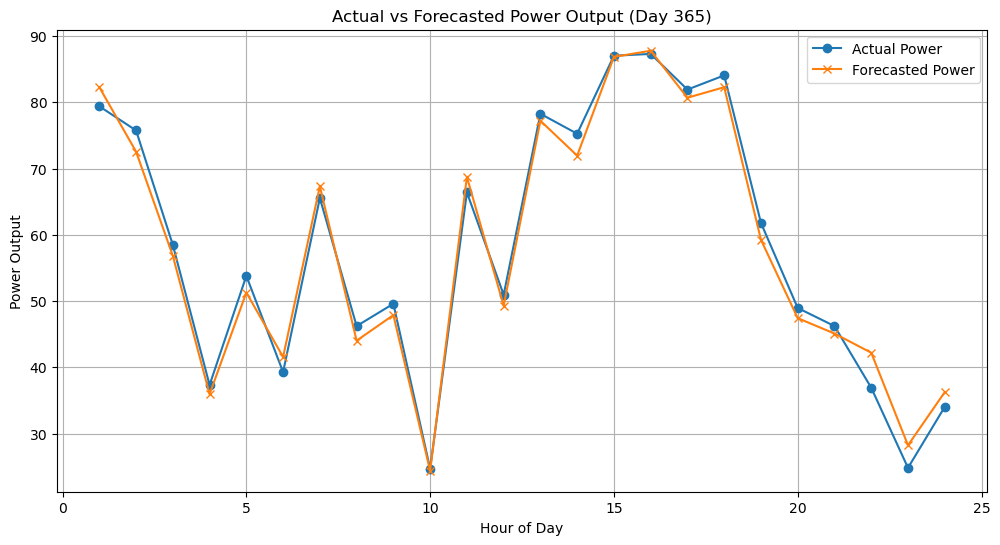


🔮 Forecast for Day 366:
    Hour  Forecasted_Power
0      1         82.265889
1      2         72.474394
2      3         56.817966
3      4         35.917261
4      5         51.277400
5      6         41.562495
6      7         67.382451
7      8         44.060305
8      9         47.929606
9     10         24.429229
10    11         68.811558
11    12         49.357818
12    13         77.284952
13    14         72.014827
14    15         86.898522
15    16         87.821084
16    17         80.722749
17    18         82.302580
18    19         59.230955
19    20         47.364210
20    21         45.010155
21    22         42.075532
22    23         28.061956
23    24         36.229327


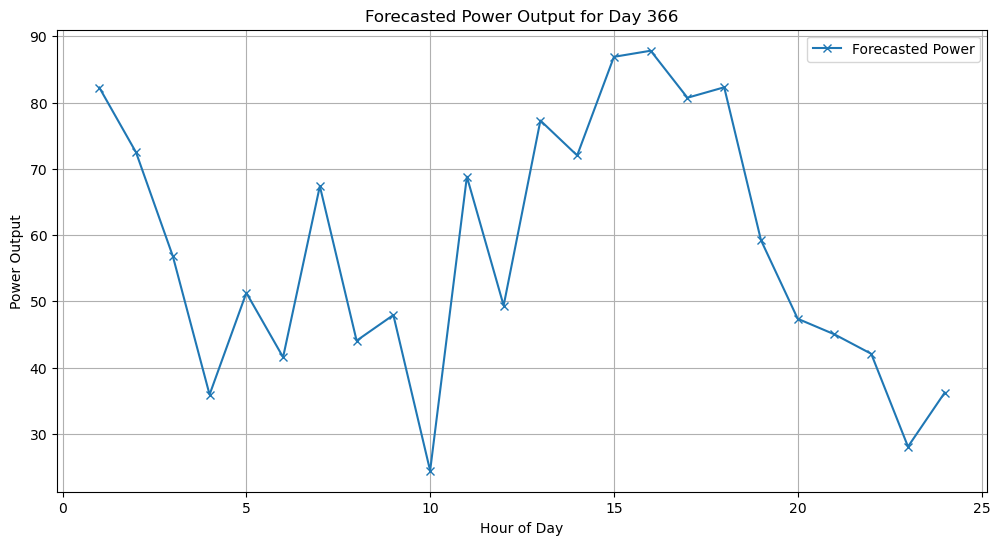

In [10]:
# =========================
# 📌 DAY 365: Actual vs Forecast Comparison
# =========================
# Extract actual last day (365th) values
actual_day_365 = y_test[-24:].values  # last 24 hours of true power output

# Extract features for last day and predict
last_day_features = X_test[-24:].copy()

# Scale features
last_day_scaled = scaler.transform(last_day_features)

# Predict using trained model
day_365_pred = svm_model.predict(last_day_scaled)

# Compare Actual vs Forecast (Day 365)
errors = actual_day_365 - day_365_pred
absolute_errors = np.abs(errors)

comparison_data = pd.DataFrame({
    'Hour': range(1, 25),
    'Actual Power': actual_day_365,
    'Forecasted Power': day_365_pred,
    'Error (Actual - Forecast)': errors,
    'Absolute Error': absolute_errors
})

print("\n🔍 Comparison of Actual vs Forecasted Power for Day 365:")
print(comparison_data)

# Calculate evaluation metrics
day365_rmse = np.sqrt(mean_squared_error(actual_day_365, day_365_pred))
day365_mae = mean_absolute_error(actual_day_365, day_365_pred)
day365_r2 = r2_score(actual_day_365, day_365_pred)

print("\n📊 Day 365 Forecast Metrics:")
print(f"RMSE: {day365_rmse:.2f}")
print(f"MAE: {day365_mae:.2f}")
print(f"R²: {day365_r2:.2f}")

# Plot Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), actual_day_365, marker='o', label='Actual Power')
plt.plot(range(1, 25), day_365_pred, marker='x', label='Forecasted Power')
plt.title('Actual vs Forecasted Power Output (Day 365)')
plt.xlabel('Hour of Day')
plt.ylabel('Power Output')
plt.legend()
plt.grid(True)
plt.show()


# =========================
# 📌 DAY 366: Forecast Only
# =========================

# Prepare data for forecasting Day 366
day_366_features = last_day_features.copy()
day_366_features['Day'] += 1  # move to next day

# Handle month transition if needed (e.g., day 31 -> 1, new month)
if (day_366_features['Day'] > 31).any():
    day_366_features['Day'] = 1
    day_366_features['Month'] += 1

# Scale features
day_366_scaled = scaler.transform(day_366_features)

# Forecast Day 366
day_366_pred = svm_model.predict(day_366_scaled)

# Put results in DataFrame
forecast_day366_data = pd.DataFrame({
    'Hour': range(1, 25),
    'Forecasted_Power': day_366_pred
})

print("\n🔮 Forecast for Day 366:")
print(forecast_day366_data)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), day_366_pred, marker='x', label='Forecasted Power')
plt.title('Forecasted Power Output for Day 366')
plt.xlabel('Hour of Day')
plt.ylabel('Power Output')
plt.legend()
plt.grid(True)
plt.show()
